# Project on Image Analysis using Support Vector Machine

In [1]:
#Ignoring warnings about few features being depreciated
import warnings
warnings.filterwarnings("ignore")

#Import packages
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread, imshow

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [3]:
#Ignoring warnings about few features being depreciated
import warnings
warnings.filterwarnings("ignore")

#Import packages
import pandas as pd
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.transform import resize

#Dictionary for loading images

fruit_img = {}

for i in range(1,81):
    fruit_img["fruit_off{}".format(i)]=0

#Load images and grayscale them

for i in range(1,81):
    fruit_img['fruit_off{}'.format(i)] = imread('./images/{}.png'.format(i), as_grey = True)
    
#Resize the images to 70x100

fruit_res = {}

for i in range(1,81):
    fruit_res['fruit{}'.format(i)] = resize(fruit_img['fruit_off{}'.format(i)],(120,150))

#Reshape the data into a 1-d array

fruit_data = {}

for i in range(1,81):
    fruit_data['fruit1d_{}'.format(i)] = np.reshape(fruit_res['fruit{}'.format(i)], (120*150))

#Stacking individual image data and images into a single multi-dimensional array

fruit_d_stack = np.stack((fruit_data.values()), axis = 0)
fruit_stack = np.stack((fruit_res.values()), axis = 0)
target = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3])
target_names = np.array(['Banana','Pineapple','Kiwi','Apple'])

#Image dataset with empty fields
fruits = {'data':0, 'images':0, 'target':0, 'target_names':0}


#Loading data and image arrays into image-dataset
fruits['data'] = fruit_d_stack
fruits['images'] = fruit_stack
fruits['target'] = target
fruits['target_names'] = target_names

len(fruits)

4

In [4]:
#Simple train-test split 
Xtrain, Xtest, ytrain, ytest = train_test_split(fruits['data'], fruits['target'],stratify = fruits['target'] ,test_size=0.3 ,random_state=0)

In [5]:
# InitializeDimension Reduction model

pca = PCA(svd_solver='randomized', n_components=15, whiten=True, random_state=0)

# Initialize SVC model

svc = SVC(kernel='rbf',  class_weight='balanced', probability=True)

# Create pipleline model

model = make_pipeline(pca, svc)
model.fit(Xtrain, ytrain);

In [6]:
#Predict on X_test
y_test_hat_svc=model.predict(Xtest)

In [7]:
acc_out=accuracy_score(ytest,y_test_hat_svc)*100
print("Out-of-sample Accuracy: ", acc_out)
y_pred_train=model.predict(Xtrain)
acc_in= accuracy_score(ytrain,y_pred_train)*100
print("In-sample Accuracy: ", acc_in)
print(classification_report(ytest, y_test_hat_svc, target_names=fruits['target_names']))

Out-of-sample Accuracy:  79.16666666666666
In-sample Accuracy:  89.28571428571429
             precision    recall  f1-score   support

     Banana       0.83      0.83      0.83         6
  Pineapple       1.00      1.00      1.00         6
       Kiwi       0.71      0.83      0.77         6
      Apple       0.60      0.50      0.55         6

avg / total       0.79      0.79      0.79        24



In [8]:
#Plotting multiclass ROC
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


X = fruits['data']
y = fruits['target']
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify = y, random_state=0)

#Using OneVsRest Classifier and getting probability for each class
pca = PCA(svd_solver='randomized', n_components=15, whiten=True, random_state=0)
svc = SVC(kernel='rbf',  class_weight='balanced', probability=True)
model = make_pipeline(pca, svc)


classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

#fpr[i], tpr[i], _ = roc_curve(y_test[:, 0], y_score[:, 0])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


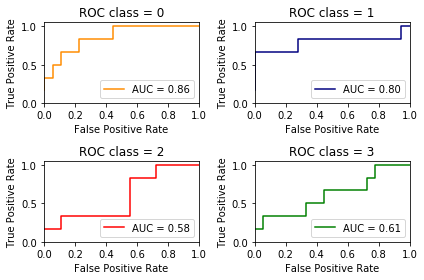

In [9]:
#Plotting ROC and printing AUC values
plt.figure()

#Plotting ROC for class 0
plt.subplot(221)
plt.plot(fpr[0], tpr[0], color='darkorange', label='AUC = %0.2f' % roc_auc[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 0')
plt.legend(loc="lower right")

#Plotting ROC for class 1
plt.subplot(222)
plt.plot(fpr[1], tpr[1], color='navy', label='AUC = %0.2f' % roc_auc[1])
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 1')
plt.legend(loc="lower right")

#Plotting ROC for class 2
plt.subplot(223)
plt.plot(fpr[2], tpr[2], color='red', label='AUC = %0.2f' % roc_auc[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 2')
plt.legend(loc="lower right")

#Plotting ROC for class 3
plt.subplot(224)
plt.plot(fpr[3], tpr[3], color='green', label='AUC = %0.2f' % roc_auc[3])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 3')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [11]:
#Using Stratified K Fold validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_svm = cross_val_score(model, fruits['data'], fruits['target'], cv=cv, scoring='accuracy')
#checking the accuracies 
print("Cross Validation Scores for Svm: {}".format(accuracy_svm))
print("Mean Accuracy Score for Svm: {}".format(np.mean(accuracy_svm)))
print("As we can see, the accuracy changed from {} without Stratified CV to a mean accuracy of {} when using Stratified CV with a max accuracy of {}".format(acc_out,np.mean(accuracy_svm),max(accuracy_svm)))

Cross Validation Scores for Svm: [0.625  0.6875 0.8125 0.4375 0.625 ]
Mean Accuracy Score for Svm: 0.6375
As we can see, the accuracy changed from 79.16666666666666 without Stratified CV to a mean accuracy of 0.6375 when using Stratified CV with a max accuracy of 0.8125


In [12]:
# Let's apply grid search with cross validation to find the best value for C and gamma

from sklearn.model_selection import GridSearchCV 
param_grid = {'svc__C': [0.1,0.5,1,5],
              'svc__gamma': [0.0001, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv = 5, scoring='accuracy')
grid.fit(Xtrain, ytrain)
print(grid.best_params_)

{'svc__C': 5, 'svc__gamma': 0.005}


In [13]:
#model with best parameters
bestModel = grid.best_estimator_
y_test_hat = bestModel.predict(Xtest)
y_pred_train1=bestModel.predict(Xtrain)

In [14]:
#checking the accuracies of the model with best parameters from grid search 
acc_out1=accuracy_score(ytest,y_test_hat)*100
print("Out-of-sample Accuracy: ", acc_out1)
y_pred_train=bestModel.predict(Xtrain)
acc_in1= accuracy_score(ytrain,y_pred_train1)*100
print("In-sample Accuracy: ", acc_in1)
#displaying classification report 
print(classification_report(ytest, y_test_hat, target_names=fruits['target_names']))

Out-of-sample Accuracy:  75.0
In-sample Accuracy:  75.0
             precision    recall  f1-score   support

     Banana       0.71      0.83      0.77         6
  Pineapple       1.00      1.00      1.00         6
       Kiwi       0.75      0.50      0.60         6
      Apple       0.57      0.67      0.62         6

avg / total       0.76      0.75      0.75        24



In [15]:
#Plotting multiclass ROC
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


X = fruits['data']
y = fruits['target']
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify = y, random_state=0)
# InitializeDimension Reduction model
pca = PCA(svd_solver='randomized', n_components=15, whiten=True, random_state=0)

# Initialize SVC model
svc = SVC(kernel='rbf',  class_weight='balanced', probability=True, C=5, gamma= 0.005)

# Create pipleline model
model = make_pipeline(pca, svc)

#Using OneVsRest Classifier and getting probability for each class
classifier = OneVsRestClassifier(model)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

#fpr[i], tpr[i], _ = roc_curve(y_test[:, 0], y_score[:, 0])
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


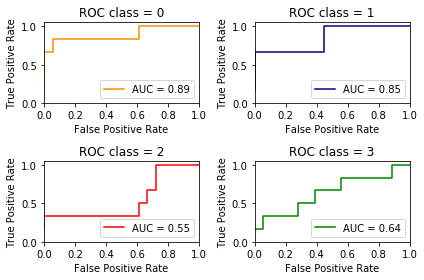

In [16]:
#Plotting ROC and printing AUC values
plt.figure()

#Plotting ROC for class 0
plt.subplot(221)
plt.plot(fpr[0], tpr[0], color='darkorange', label='AUC = %0.2f' % roc_auc[0])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 0')
plt.legend(loc="lower right")

#Plotting ROC for class 1
plt.subplot(222)
plt.plot(fpr[1], tpr[1], color='navy', label='AUC = %0.2f' % roc_auc[1])
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 1')
plt.legend(loc="lower right")

#Plotting ROC for class 2
plt.subplot(223)
plt.plot(fpr[2], tpr[2], color='red', label='AUC = %0.2f' % roc_auc[2])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 2')
plt.legend(loc="lower right")

#Plotting ROC for class 3
plt.subplot(224)
plt.plot(fpr[3], tpr[3], color='green', label='AUC = %0.2f' % roc_auc[3])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC class = 3')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()